In [1]:
#This project focuses on working with dict() in Python
# DATA MINING FOR THE DATA SET OF US_births_1994-2003_CDC_NCHS.csv

In [2]:
#Using open() and read() to read in the text
f = open("US_births_1994-2003_CDC_NCHS.csv","r")
text = f.read()
line_text = text.split("\n")
print(line_text[0:10])

['year,month,date_of_month,day_of_week,births', '1994,1,1,6,8096', '1994,1,2,7,7772', '1994,1,3,1,10142', '1994,1,4,2,11248', '1994,1,5,3,11053', '1994,1,6,4,11406', '1994,1,7,5,11251', '1994,1,8,6,8653', '1994,1,9,7,7910']


In [3]:
#Function to read in the text and split the string
def read_csv(file_name):
    string_data = open(file_name).read()
    string_list = string_data.split("\n")[1:]
    final_list=[]
    for i in string_list:
        int_fields=[]
        string_fields=i.split(",")
        for j in string_fields:
            int_fields.append(int(j))
        final_list.append(int_fields)
    return final_list

cdc_list = read_csv("US_births_1994-2003_CDC_NCHS.csv")
print (cdc_list[0:10])
    

[[1994, 1, 1, 6, 8096], [1994, 1, 2, 7, 7772], [1994, 1, 3, 1, 10142], [1994, 1, 4, 2, 11248], [1994, 1, 5, 3, 11053], [1994, 1, 6, 4, 11406], [1994, 1, 7, 5, 11251], [1994, 1, 8, 6, 8653], [1994, 1, 9, 7, 7910], [1994, 1, 10, 1, 10498]]


In [4]:
#Function to extract the month of births
def month_births(name_list):
    births_per_month={}
    for i in name_list:
        month = i[1]
        births =int(i[4])
        if month in births_per_month:
            births_per_month[month] = births_per_month[month] + births
        else:
            births_per_month[month] = births
    return births_per_month

cdc_month_births = month_births(cdc_list)
cdc_month_births

{1: 3232517,
 2: 3018140,
 3: 3322069,
 4: 3185314,
 5: 3350907,
 6: 3296530,
 7: 3498783,
 8: 3525858,
 9: 3439698,
 10: 3378814,
 11: 3171647,
 12: 3301860}

In [5]:
#Function to extract dates of births
def dow_births(date_list):
    week_birth = dict()
    
    for i in date_list:
        date_week = i[3]
        births =int(i[4])
        if date_week in week_birth:
            week_birth[date_week] = week_birth[date_week] + births
        else:
            week_birth[date_week] = births
    return week_birth

cdc_day_births = dow_births(cdc_list)
cdc_day_births
        
    
    
    

{1: 5789166,
 2: 6446196,
 3: 6322855,
 4: 6288429,
 5: 6233657,
 6: 4562111,
 7: 4079723}

In [6]:
#Function to value_count
def calc_counts(data,column):
    general_birth = dict()
    for i in data:
        att = i[column]
        births = int(i[4])
        if att in general_birth:
            general_birth[att] = general_birth[att] + births
        else:
            general_birth[att] = births
    return general_birth
cdc_year_births = calc_counts(cdc_list,0)
cdc_month_births = calc_counts(cdc_list,1)
cdc_dom_births = calc_counts(cdc_list,2)
cdc_dow_births = calc_counts(cdc_list,3)



In [7]:
#let's examine how many births in each month
cdc_month_births


{1: 3232517,
 2: 3018140,
 3: 3322069,
 4: 3185314,
 5: 3350907,
 6: 3296530,
 7: 3498783,
 8: 3525858,
 9: 3439698,
 10: 3378814,
 11: 3171647,
 12: 3301860}

In [8]:
#Let's examine how many births in each day of the month
cdc_dom_births

{1: 1276557,
 2: 1288739,
 3: 1304499,
 4: 1288154,
 5: 1299953,
 6: 1304474,
 7: 1310459,
 8: 1312297,
 9: 1303292,
 10: 1320764,
 11: 1314361,
 12: 1318437,
 13: 1277684,
 14: 1320153,
 15: 1319171,
 16: 1315192,
 17: 1324953,
 18: 1326855,
 19: 1318727,
 20: 1324821,
 21: 1322897,
 22: 1317381,
 23: 1293290,
 24: 1288083,
 25: 1272116,
 26: 1284796,
 27: 1294395,
 28: 1307685,
 29: 1223161,
 30: 1202095,
 31: 746696}

BELOWS, WE WILL BE USING PANDAS TO MINE THE DATASET

In [9]:
#Using pandas to import the text
import pandas as pd
input_path ='/Users/phuph/Documents/GitHub/Phu-PythonProject/US_births_1994-2003_CDC_NCHS.csv'
text_pd = pd.read_csv(input_path)
text_pd[0:5]

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053


In [20]:
text_pd["births"].describe()
#We can see that on our dataset from 1994 to 2003, on average there is over 10,876 birth per day

count     3652.000000
mean     10876.817360
std       1858.566631
min       6443.000000
25%       8844.500000
50%      11615.000000
75%      12274.250000
max      14540.000000
Name: births, dtype: float64

In [30]:
#The date with the lowest number of birth 
text_pd.loc[text_pd["births"].idxmin()]


year             2001
month              12
date_of_month      25
day_of_week         2
births           6443
Name: 2915, dtype: int64

In [10]:
#See how many unique year in the array
text_pd["year"].unique()


array([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003], dtype=int64)

In [11]:
#Group by year, count number of births
cdc_year = text_pd.groupby('year', as_index=False)['births'].sum()
cdc_year.sort_values(by= ["births"],ascending = False)


,year,births
9,2003,4089950
6,2000,4058814
7,2001,4025933
8,2002,4021726
5,1999,3959417
0,1994,3952767
4,1998,3941553
1,1995,3899589
2,1996,3891494
3,1997,3880894


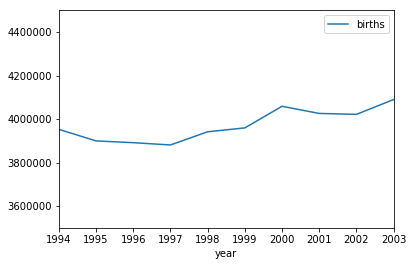

In [12]:
import matplotlib.pylab as plt
%matplotlib inline

cdc_year.plot(x=cdc_year['year'],y=1,ylim=[3500000,4500000])

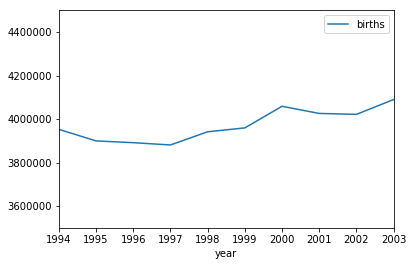

In [13]:
import matplotlib.pylab as plt
%matplotlib inline

cdc_year.plot(x=cdc_year['year'],y=1,ylim=[3500000,4500000])

<Container object of 10 artists>

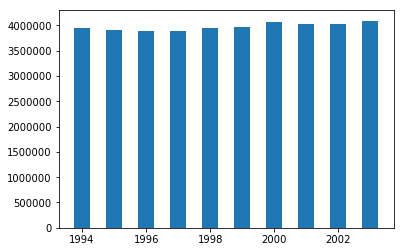

In [14]:
bar_positions =cdc_year["year"]
bar_heights = cdc_year["births"]
fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights,0.5)


In [15]:
birth_heatmap = text_pd.groupby([text_pd["year"],text_pd["month"]],as_index=False).sum()

In [16]:
#birth_heatmap["year"] = birth_heatmap.index[0]
birth_graph = birth_heatmap.drop(["date_of_month","day_of_week"],axis=1)

In [17]:
import seaborn as sns

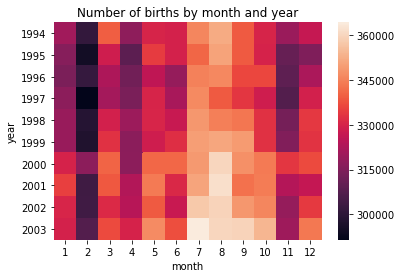

In [18]:
birth= birth_graph.pivot("year","month","births")
ax = sns.heatmap(birth)
ax.set_title("Number of births by month and year")

The heatmap highlights the fact that Feb, Apr and Nov have been having the highest number of births for the period from 2003 to 1994. 

# TIME SERIES ANALYSIS

In [57]:
birth_date = text_pd[["year","month","date_of_month"]]
birth_date = birth_date.rename(columns={"date_of_month":"day"})
c = pd.to_datetime(birth_date)
text_pd["birth_date"] = c
text_pd.head(5)



,year,month,date_of_month,day_of_week,births,birth_date
0,1994,1,1,6,8096,1994-01-01
1,1994,1,2,7,7772,1994-01-02
2,1994,1,3,1,10142,1994-01-03
3,1994,1,4,2,11248,1994-01-04
4,1994,1,5,3,11053,1994-01-05


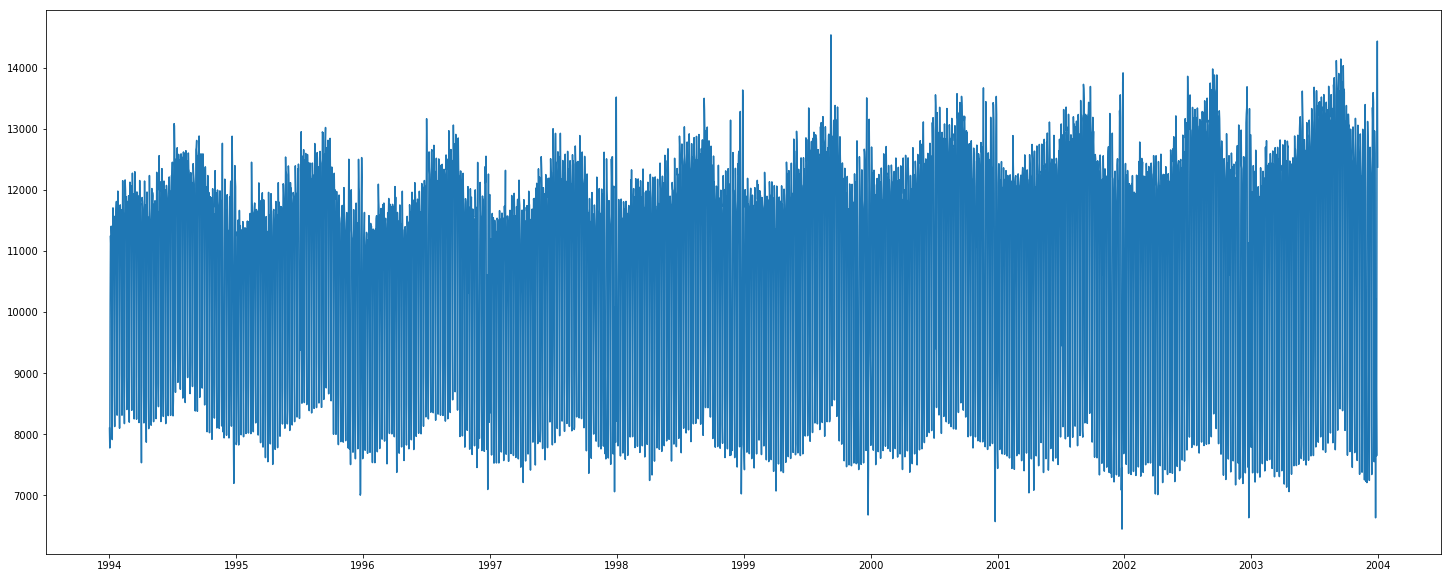

In [68]:
ts_birth= text_pd["births"]
ts_date= text_pd["birth_date"]
plt.figure(figsize=(25,10))
plt.plot(ts_date,ts_birth)

## Linear Regression